<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data_multi_delta_(0)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,33.932637,-0.710927,43.221710,43.997735,-0.776025
1,0.0,1.0,59.676255,0.709515,70.385770,69.851272,0.534498
2,0.0,2.0,50.825687,-0.680117,60.145570,60.962914,-0.817344
3,0.0,3.0,26.904696,-0.451262,36.453433,36.939787,-0.486354
4,0.0,4.0,70.789471,1.506905,82.296376,81.011938,1.284438
...,...,...,...,...,...,...,...
59995,999.0,55.0,27.468588,2.022701,39.491290,37.845416,1.645873
59996,999.0,56.0,90.760524,-0.434942,100.325582,100.754650,-0.429068
59997,999.0,57.0,55.396823,1.217099,66.613922,65.604780,1.009142
59998,999.0,58.0,50.322459,0.902021,61.224480,60.561099,0.663381


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    33.932637 -0.710927   43.221710   43.997735 -0.776025
      1.0    59.676255  0.709515   70.385770   69.851272  0.534498
      2.0    50.825687 -0.680117   60.145570   60.962914 -0.817344
      3.0    26.904696 -0.451262   36.453433   36.939787 -0.486354
      4.0    70.789471  1.506905   82.296376   81.011938  1.284438
...                ...       ...         ...         ...       ...
999.0 55.0   27.468588  2.022701   39.491290   37.845416  1.645873
      56.0   90.760524 -0.434942  100.325582  100.754650 -0.429068
      57.0   55.396823  1.217099   66.613922   65.604780  1.009142
      58.0   50.322459  0.902021   61.224480   60.561099  0.663381
      59.0   58.227955  0.795534   69.023488   68.418793  0.604696

[60000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    33.932637 -0.710927   43.221710   43.997735 -0.776025
      1.0    59.676255  0.709515   70.385770   69.851272  0.534498
      2.0    50.825687 -0.680117   60.145570   60.962914 -0.817344
      3.0    26.904696 -0.451262   36.453433   36.939787 -0.486354
      4.0    70.789471  1.506905   82.296376   81.011938  1.284438
...                ...       ...         ...         ...       ...
999.0 55.0   27.468588  2.022701   39.491290   37.845416  1.645873
      56.0   90.760524 -0.434942  100.325582  100.754650 -0.429068
      57.0   55.396823  1.217099   66.613922   65.604780  1.009142
      58.0   50.322459  0.902021   61.224480   60.561099  0.663381
      59.0   58.227955  0.795534   69.023488   68.418793  0.604696

[60000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,33.932637,-0.710927,43.221710,43.997735,-0.776025
1,0.0,1.0,59.676255,0.709515,70.385770,69.851272,0.534498
2,0.0,2.0,50.825687,-0.680117,60.145570,60.962914,-0.817344
3,0.0,3.0,26.904696,-0.451262,36.453433,36.939787,-0.486354
4,0.0,4.0,70.789471,1.506905,82.296376,81.011938,1.284438
...,...,...,...,...,...,...,...
59995,999.0,55.0,27.468588,2.022701,39.491290,37.845416,1.645873
59996,999.0,56.0,90.760524,-0.434942,100.325582,100.754650,-0.429068
59997,999.0,57.0,55.396823,1.217099,66.613922,65.604780,1.009142
59998,999.0,58.0,50.322459,0.902021,61.224480,60.561099,0.663381


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    33.932637 -0.710927   43.221710   43.997735 -0.776025
      1.0    59.676255  0.709515   70.385770   69.851272  0.534498
      2.0    50.825687 -0.680117   60.145570   60.962914 -0.817344
      3.0    26.904696 -0.451262   36.453433   36.939787 -0.486354
      4.0    70.789471  1.506905   82.296376   81.011938  1.284438
...                ...       ...         ...         ...       ...
999.0 55.0   27.468588  2.022701   39.491290   37.845416  1.645873
      56.0   90.760524 -0.434942  100.325582  100.754650 -0.429068
      57.0   55.396823  1.217099   66.613922   65.604780  1.009142
      58.0   50.322459  0.902021   61.224480   60.561099  0.663381
      59.0   58.227955  0.795534   69.023488   68.418793  0.604696

[60000 rows x 5 columns]

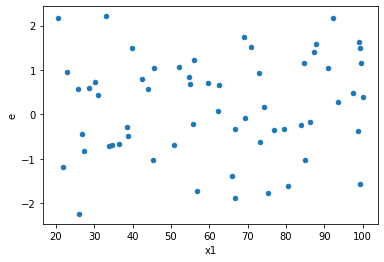

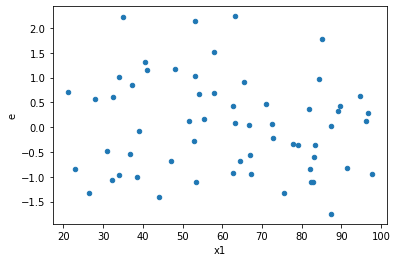

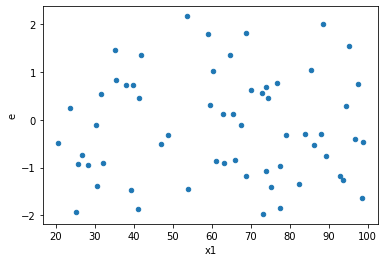

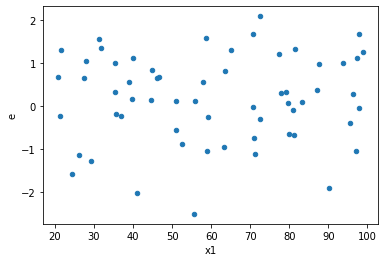

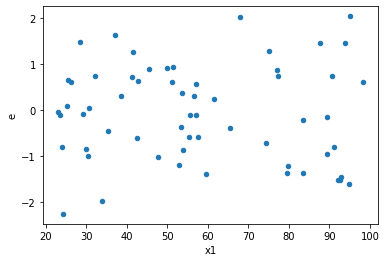

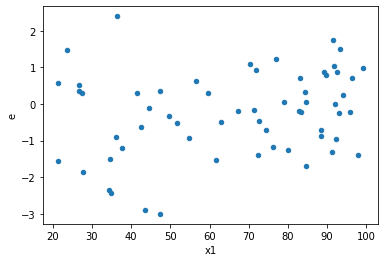

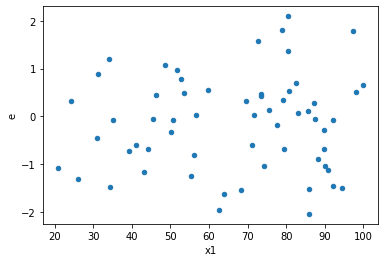

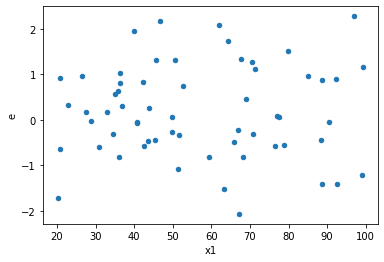

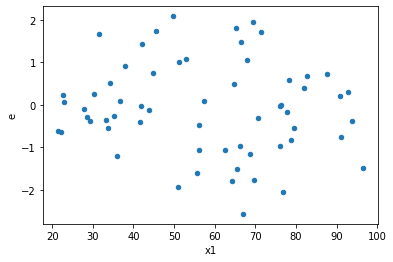

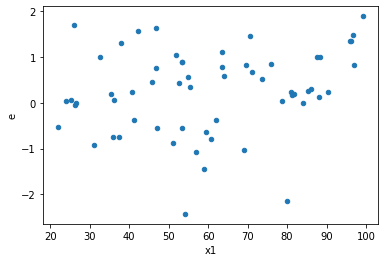

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,28.0,30.0,33.13517852751873,36.398697395551764,1.183399233125669,1.2132899131850587,1.025258322992521,0.9435169009385749,0.5282415495307126,0.47175845046928744,Reject001=1 : Homoscedasticity
2.0,37.0,21.0,41.99408655753308,25.28622065920857,1.1349753123657589,1.2041057456765987,1.060909195607738,0.9080238166493166,0.5459880916753417,0.4540119083246583,Reject001=1 : Homoscedasticity
4.0,37.0,21.0,30.16967042147965,32.128945488574935,0.8153964978778284,1.529949785170235,1.876326166658946,0.1278568245133831,0.9360715877433085,0.06392841225669155,Reject001=1 : Homoscedasticity
9.0,26.0,32.0,16.179406599948685,27.78111009874022,0.6222848692287956,0.8681596905856319,1.3951161815352375,0.368086992619598,0.815956503690201,0.184043496309799,Reject001=1 : Homoscedasticity
11.0,29.0,29.0,16.439617488348954,19.528398457786256,0.5668833616672053,0.6733930502684916,1.1878864256803041,0.6459917755167373,0.6770041122416314,0.3229958877583686,Reject001=1 : Homoscedasticity
12.0,31.0,27.0,22.80585873559954,23.20107810817381,0.7356728624386948,0.8592991891916226,1.1680452454683685,0.6861240177795076,0.6569379911102462,0.3430620088897538,Reject001=1 : Homoscedasticity
18.0,30.0,28.0,16.435120337461797,47.15515458108432,0.5478373445820599,1.6841126636101542,3.074110737914277,0.0037141838435559293,0.998142908078222,0.0018570919217779647,Reject001=0 : Heteroscedasticity
19.0,27.0,31.0,24.54778918663516,36.47669657963897,0.9091773772827837,1.176667631601257,1.2942112958396623,0.48611632129358173,0.7569418393532091,0.24305816064679087,Reject001=1 : Homoscedasticity
20.0,28.0,30.0,21.785356525910355,41.557367386523325,0.7780484473539413,1.3852455795507774,1.7804104413572805,0.12408760731249036,0.9379561963437548,0.06204380365624518,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,28.0,30.0,33.13517852751873,36.398697395551764,1.183399233125669,1.2132899131850587,1.025258322992521,0.9435169009385749,Reject001=1 : Homoscedasticity
1.0,27.0,31.0,27.7836555837007,23.534477082718,1.0290242808778036,0.7591766800876774,0.7377636215153891,0.4254501557618091,Reject001=1 : Homoscedasticity
2.0,37.0,21.0,41.99408655753308,25.28622065920857,1.1349753123657589,1.2041057456765987,1.060909195607738,0.9080238166493166,Reject001=1 : Homoscedasticity
3.0,30.0,28.0,32.577425016680756,27.157142978343945,1.085914167222692,0.9698979635122837,0.8931626391732889,0.7597247054508588,Reject001=1 : Homoscedasticity
4.0,37.0,21.0,30.16967042147965,32.128945488574935,0.8153964978778284,1.529949785170235,1.876326166658946,0.1278568245133831,Reject001=1 : Homoscedasticity
5.0,23.0,35.0,43.0945565015612,29.169403167131573,1.8736763696330956,0.833411519060902,0.44480014402065665,0.04464413788321439,Reject001=1 : Homoscedasticity
6.0,34.0,24.0,38.54034567754519,18.729085206605127,1.1335395787513292,0.7803785502752136,0.6884440251613037,0.31197607894738255,Reject001=1 : Homoscedasticity
7.0,27.0,31.0,37.53436389629901,22.19780358386417,1.3901616257888523,0.7160581801246507,0.5150898764870746,0.08369501646719187,Reject001=1 : Homoscedasticity
8.0,30.0,28.0,41.37201690944325,26.867226863739514,1.379067230314775,0.9595438165621255,0.6957919059124533,0.33138394384449676,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      982
Reject001=0 : Heteroscedasticity     18
Name: Result_test, dtype: int64